# Honolulu, Hawaii Vacation
Date planned: 25 May to 3 June, 2017

In [136]:
#To draw plots inline - not zoomable
%matplotlib inline

#import style library
from matplotlib import style

#Set the style
style.use('fivethirtyeight')

# importing matplotlib module 
import matplotlib.pyplot as plt

In [250]:
#numerical mathematics library - needed for matplotlib
import numpy as np

#Library of tools for data manipulation and analysis
import pandas as pd

#Needed for t-test
import scipy.stats as stats

In [138]:
#a class which allows maninpulation of the hours, minutes, seconds and milliseconds format
    #https://www.guru99.com/date-time-and-datetime-classes-in-python.html
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [139]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy

# automatically generates mapped classes and relationships from a database schema,
from sqlalchemy.ext.automap import automap_base

# establishes all conversations with the database and represents a “holding zone” 
from sqlalchemy.orm import Session

# ability to create an engine which connects to the database
from sqlalchemy import create_engine, func, inspect

In [140]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [141]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [142]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [143]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [144]:
# Using the inspector to print the column names within the 'measurement' table and its types
Mcolumns = inspector.get_columns('Measurement')
for column in Mcolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [145]:
# Using the inspector to print the column names within the 'station' table and its types
Scolumns = inspector.get_columns('Station')
for column in Scolumns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [146]:
# Listing the tables in the database
    #https://www.chrisnicoll.net/2020/02/exploring-an-sqlite-database-from-jupyter-notebook/
#engine.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()

In [147]:
# Query Records in the the Database
measurementcheck = engine.execute("SELECT * FROM measurement LIMIT 5")

for record in measurementcheck:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


In [148]:
stationcheck = engine.execute("SELECT * FROM station LIMIT 5")

for record in stationcheck:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


In [149]:
#Create measurement dataframe using SQL query
#conn = engine.connect()
#measurement_df= pd.read_sql("SELECT * FROM measurement", conn)
#measurement_df.head()

In [150]:
#Create station dataframe using SQL query
#station_df= pd.read_sql("SELECT * FROM station", conn)
#station_df.head()

In [151]:
# reflect an existing database into a new model
    ## Declare a Base using `automap_base()`
Base = automap_base()

In [152]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [153]:
# We can view all of the classes that automap found
    # Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [154]:
# Save references to each table
    # Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [155]:
# To check data -  Display the Measurement row's columns and data in dictionary format
#Mfirst_row = session.query(Measurement).first()
#Mfirst_row.__dict__

In [156]:
# Display the Station row's columns and data in dictionary format
#Sfirst_row = session.query(Station).first()
#Sfirst_row.__dict__

# Exploratory Climate Analysis

It’s possible to query a database using more SQL:

data = engine.execute("SELECT date, prcp FROM BaseballPlayer")

or more Python:

players = session.query(BaseballPlayer)

for player in players:

print(player.name_given)

In [157]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

    # Calculate the date 1 year ago from the last data point in the database
        #https://www.sqlshack.com/dateadd-sql-function-introduction-and-overview/
        #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-

In [158]:
# Earliest Date
firstdatex = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
print(firstdatex)

('2010-01-01',)


In [159]:
# Latest Date
lastdatex = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastdatex)

('2017-08-23',)


In [160]:
## To enable month and year calculations
#from dateutil.relativedelta import *

In [161]:
# date 1 year ago from lastdatex
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [162]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#lastdate = engine.execute('SELECT MAX(date)FROM Measurement').fetchall()
#lastdate

In [163]:
#lastyear  = (lastdatex - relativedelta(years=1))
#print(f"The date one year before the last data point is {lastyear}")

#lastyear  = (lastdatedt - relativedelta(years=1)).strftime("%d/%m/%Y")
#print(f"The date one year before the last data point is {lastyear}")

In [164]:
    #Find last date in table
#lastdate = engine.execute('SELECT MAX(date)FROM Measurement').fetchall()
#lastdatedt = dt.date(2017, 8, 23)
#lastdatedtStr = lastdatedt.strftime("%d/%m/%Y")
#print(f"The latest date in the data provided is {lastdatedtStr}")

In [165]:
#testubg datetime (dt)
#dt.date.today()

In [166]:
#date = lastdate[0]
#date

In [167]:
#Convert lastdate to datetime(dt)
#x = pd.to_datetime(date, format = '%Y-%m-%d')
#print(x)

#y = x.strftime("%d-%m-%Y")
#print(y)


In [168]:
#x.year

In [169]:
#The date 1 year ago
    #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-
    #prev_year_date  = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#lastyear  = (lastdatedt - relativedelta(years=1)).strftime("%d/%m/%Y")
#print(f"The date one year before the last data point is {lastyear}")



#y + relativedelta(years=-1)
#dtime = dt.date(2019, 10, 20)

In [170]:
# Calculate the date 1 year ago from the last data point in the database
    #https://www.sqlshack.com/dateadd-sql-function-introduction-and-overview/
    #https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#How-to-convert-a-string-to-datetime-in-python-

#30days ahead
#delta = dt.timedelta(days=30)
#print(x + delta)

#1 Month ahead
#print(x + relativedelta(months=+1))


#yearago = engine.execute('SELECT DATEADD(YY,-3, '2017-08-23'')

#365 days abck
#delta = dt.timedelta(days=-365)
#print(x + delta)



In [171]:
# Perform a query to retrieve the data and precipitation scores
#SQL query - Select only the `date` and `prcp` values.

#prcp = engine.execute("""SELECT date, prcp FROM Measurement
#                     WHERE date between '2016-08-23' AND '2017-08-23'
#                     """).fetchall()
#len(prcp)

In [172]:
# Perform a query to retrieve the data and precipitation scores
#Pandas query - Select only the `date` and `prcp` values.

        #results = session.query(Measurement.date, Measurement.prcp).\
        #    order_by(Emoji.score.desc()).all())
        # Had to remove the .all() for dataframe to work

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
        filter(Measurement.date <= '2017-08-23')

precip[:10]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0)]

In [173]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe/36257640
#pd.read_sql(session.query(Complaint).filter(Complaint.id == 2).statement,session.bind) 
precip_df = pd.read_sql(precip.statement,session.bind).rename(columns={"date":"Date", "prcp":"Precipitation"})

precip_df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [174]:
#set the index to the date column
precipdate = precip_df.set_index("Date")
precipdate

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [175]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#prcp_df = pd.read_sql("""SELECT date AS Date, prcp As Precipitation FROM Measurement
#                     WHERE date between '2016-08-23' AND '2017-08-23'
#                     """, conn)
#prcp_df

In [176]:
# Sort the dataframe by date
precipdate = precipdate.sort_index()
precipdate

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [177]:
# Use Pandas Plotting with Matplotlib to plot the data
    #Jupyter has a nice feature that automatically converts long outputs into a box with a scrollbar. 
    #Unfortunately many times you don’t actually want it, especially when you want to compare several plots.
    #One way to disable the feature is to put the following in a separate cell
    #and run it before you run the cell that generates long output
    #https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
#%%javascript
#IPython.OutputArea.prototype._should_scroll = function(lines) {
#    return false;
#}

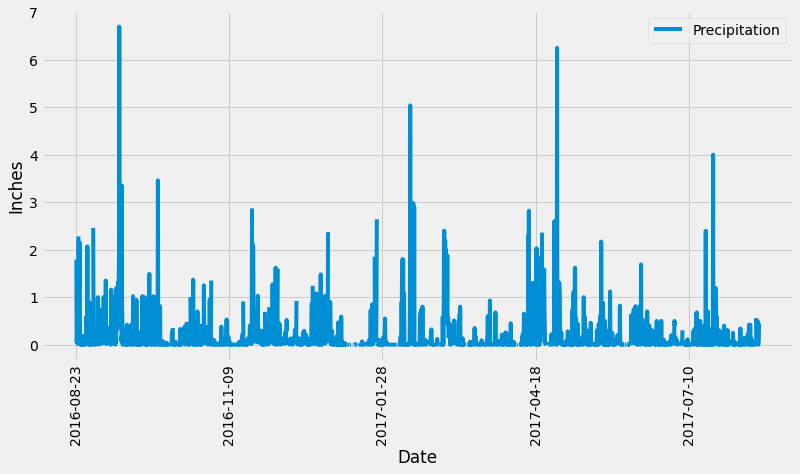

In [178]:
# Use Pandas Plotting with Matplotlib to plot the data

precipdate.plot(figsize=(12,6))
#plt.legend(["Precipitation"]);
plt.xticks(rotation=90)
#plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()

In [179]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipdate.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [180]:
#Check total count of station rows

print(session.query(Station.station).count())

9


In [181]:
# Design a query to show how many stations are available in this dataset?
    #https://docs.sqlalchemy.org/en/13/orm/query.html
    #session.query(func.count(distinct(User.name)))

# count distinct "name" values
from sqlalchemy import distinct

stationcount = session.query(func.count(distinct(Station.station))).all()
print(stationcount)

[(9,)]


In [182]:
# What are the most active stations? (i.e. what stations have the most rows)?


In [183]:
#TEST counting all rows    
session.query(Measurement.station).count()

19550

In [184]:
#TEST Joining

#join tables using station

    # This JOINs the data in the two tables together into a single dataset (here in the form of a tuple)
#joina = [Measurement.station, Station.station, Station.name, Measurement.date]
#joinaquery = session.query(*joina).filter(Measurement.station == Station.station).all()
#test data
#print(len(joinaquery))
#joinaquery[:15]


#sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
#same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

#for record in same_sporder:
#    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
#    print(
#        f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
#        f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

In [185]:
    #groupby station
    #count by station

#uniquecount = session.query(*joina, func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Measurement.station).all()
#uniquecount

#session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()



In [186]:
   #sortby count (Descending)

#uniquecountorder = session.query(*joina, func.count(Measurement.station)).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

#order_by(Emoji.score.desc()).all()
#uniquecountorder

In [187]:
#--------------

In [188]:
    #join tables using station - Need columns M.station and S.name as I want to idenitfy the station name

    # This joins the data in the two tables together into a single dataset (here in the form of a tuple)
    #This actually creates a list of each row in table A for each row in table B
station_name = [Measurement.station, Station.name]

    #This base query then reduces the above list to inlcude only rows were the filter is true
stationnamejoin = session.query(*station_name).filter(Measurement.station == Station.station).all()

    #test data to see if matches counting all rows and elevant values
print(len(stationnamejoin))
stationnamejoin[:15]

    #Sample code
    #sel = [EA.family, EA.genus, EA.species, NA.family, NA.genus, NA.species]
    #same_sporder = session.query(*sel).filter(EA.sporder == NA.sporder).limit(10).all()

    #for record in same_sporder:
    #    (ea_fam, ea_gen, ea_spec, na_fam, na_gen, na_spec) = record
    #    print(
    #        f"The European animal '{ea_fam} {ea_gen} {ea_spec}'"
    #        f"belongs to the same sporder as the North American animal '{na_fam} {na_gen} {na_spec}'.")

19550


[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US')]

In [189]:
    #Trialling building on query to count all rows - gives total does not include row
stationnamecount = session.query(*station_name).filter(Measurement.station == Station.station).count()
stationnamecount

19550

In [190]:
    #count by station
    #Trailling building on to use func.count all - includes row with total count
stationnametotal = session.query(*station_name, func.count(Measurement.station))\
.filter(Measurement.station == Station.station).all()
stationnametotal

[('USC00519397', 'WAIKIKI 717.2, HI US', 19550)]

In [191]:
    #groupby station - to get totals for each station
    #Sample code
    #session.query(Table.column, func.count(Table.column)).group_by(Table.column).all()


stationnameuniquecount = session.query(*station_name, func.count(Measurement.station))\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station).all()

stationnameuniquecount

[('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511),
 ('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)]

In [192]:
# List the stations and the counts in descending order. 
    #sortby count (Descending)
    #Samnple code: order_by(Emoji.score.desc()).all()

stationnameuniquecountdesc = session.query(*station_name, func.count(Measurement.station))\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

stationnameuniquecountdesc

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [193]:
#  Which station has the highest number of observations
stationnameuniquecountfirst = session.query(*station_name, func.count(Measurement.station))\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()
stationnameuniquecountfirst

('USC00519281', 'WAIHEE 837.5, HI US', 2772)

In [194]:
#Create variables for required elements of first station
stationhighobs = stationnameuniquecountfirst[0]
namehighobs = stationnameuniquecountfirst[1]
obshigh = stationnameuniquecountfirst[2]

print(f"The station with the highest number of observations ({obshigh}) is {namehighobs} ({stationhighobs})")

The station with the highest number of observations (2772) is WAIHEE 837.5, HI US (USC00519281)


In [195]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

    #Set the columns required
waiheetobs = [Measurement.station, Measurement.tobs]

waiheelow = session.query(*waiheetobs, func.min(Measurement.tobs)).filter(Measurement.station==stationhighobs).all()

print(f"The lowest temperature recorded for {namehighobs} station is {waiheelow[0][1]}")

The lowest temperature recorded for WAIHEE 837.5, HI US station is 54.0


In [196]:
# highest temperature recorded
waiheehigh = session.query(*waiheetobs, func.max(Measurement.tobs)).filter(Measurement.station==stationhighobs).all()

print(f"The highest temperature recorded for {namehighobs} station is {waiheehigh[0][1]}")

The highest temperature recorded for WAIHEE 837.5, HI US station is 85.0


In [197]:
# average temperature of the most active station?
waiheemean = session.query(*waiheetobs, func.avg(Measurement.tobs)).filter(Measurement.station==stationhighobs).all()

print(f"The average temperature recorded for {namehighobs} station is {waiheemean[0][1]}")

The average temperature recorded for WAIHEE 837.5, HI US station is 70.0


### Design a query to retrieve the last 12 months of temperature observation data (TOBS).

In [198]:
# Choose the station with the highest number of temperature observations.

    #base columms
stationtempobs = [Measurement.station, Station.name, Measurement.date, Measurement.tobs]


In [199]:
    #This base query then reduces the above list to inlcude only rows were the filter is true
stationtempobsjoin = session.query(*stationtempobs).filter(Measurement.station == Station.station).all()

    #test data to see if matches counting all rows and elevant values
print(len(stationtempobsjoin))
stationtempobsjoin[:5]

19550


[('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-01', 65.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-02', 63.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-03', 74.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-04', 76.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', '2010-01-06', 73.0)]

In [200]:
#Query the station with the highest oberservation count
stationtempobsmost = session.query(*stationtempobs, func.count(Measurement.station))\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).first()


stationtotalobs = stationtempobsmost[0]
nametotalobs = stationtempobsmost[1]
obstotalhgih = stationtempobsmost[4]

print(f"The station with the highest number of temperature observations ({obstotalhgih}) is {nametotalobs} ({stationtotalobs})")

The station with the highest number of temperature observations (2772) is WAIHEE 837.5, HI US (USC00519281)


In [201]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
    # Perform a query to retrieve the date and temperature scores
waiheetempobs = session.query(*stationtempobs)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= '2016-08-23')\
.filter(Measurement.date <= '2017-08-23')\
.filter(Measurement.station==stationtotalobs)

        #test data
print(waiheetempobs.count())
waiheetempobs[:10]

352


[('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-23', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-24', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-25', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-26', 80.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-27', 75.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-28', 73.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-29', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-30', 77.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-08-31', 78.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', '2016-09-01', 80.0)]

In [202]:
# Save the query results as a Pandas DataFrame

temp_df = pd.read_sql(waiheetempobs.statement,session.bind).rename(columns={"station":"Station ID",
                                                                            "name":"Station Name", 
                                                                            "date":"Date", 
                                                                            "tobs":"Temperature"})

temp_df

,Station ID,Station Name,Date,Temperature
0,USC00519281,"WAIHEE 837.5, HI US",2016-08-23,77.0
1,USC00519281,"WAIHEE 837.5, HI US",2016-08-24,77.0
2,USC00519281,"WAIHEE 837.5, HI US",2016-08-25,80.0
3,USC00519281,"WAIHEE 837.5, HI US",2016-08-26,80.0
4,USC00519281,"WAIHEE 837.5, HI US",2016-08-27,75.0
...,...,...,...,...
347,USC00519281,"WAIHEE 837.5, HI US",2017-08-14,77.0
348,USC00519281,"WAIHEE 837.5, HI US",2017-08-15,77.0
349,USC00519281,"WAIHEE 837.5, HI US",2017-08-16,76.0
350,USC00519281,"WAIHEE 837.5, HI US",2017-08-17,76.0


In [203]:
#set the index to the date column
#tempdate = temp_df.set_index("Date")
#tempdate

In [204]:
# Sort the dataframe by date
#tempdate = tempdate.sort_index()
#tempdate

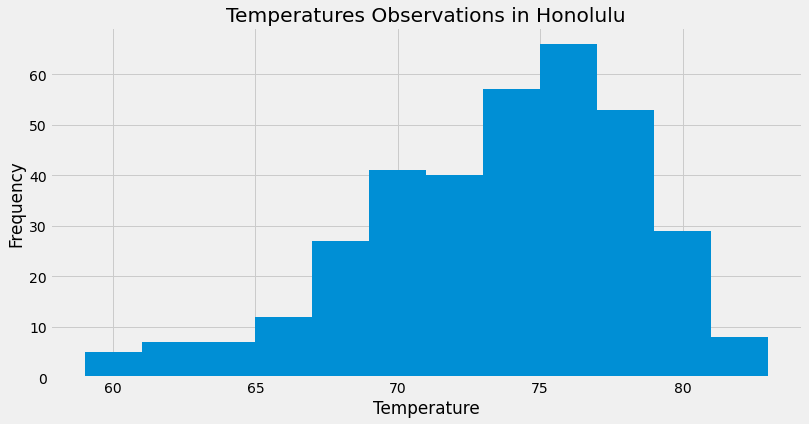

In [205]:
fig, ax = plt.subplots(figsize = (12,6))

ax.hist(temp_df["Temperature"], bins=12)
ax.set_title("Temperatures Observations in Honolulu")
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
#plt.xticks(bins)

plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I
Use the t-test to determine whether the difference in the mean temperatures for June and December, if any, is statistically significant.

Will you use a paired t-test, or an unpaired t-test? Why?

In [206]:
#Function to createa list of temps per month
def monthtemps(month):

    return session.query((Measurement.tobs))\
                         .filter(func.strftime("%m", Measurement.date) == month).all()

In [207]:
junetemps = monthtemps('06')
print(len(junetemps))
print(junetemps[0:10])

1700
[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,)]


In [225]:
np.array(junetemps)

array([[78.],
       [76.],
       [78.],
       ...,
       [74.],
       [76.],
       [75.]])

In [208]:
dectemps = monthtemps('12')
print(len(dectemps))
print(dectemps[0:10])

1517
[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,)]


In [209]:
#identify the average temperature in June at all stations across all available years in the dataset. 

#function to calculate average for a particluar month with entire dataset
def avgtemp(month):

    return session.query(func.avg(Measurement.tobs))\
                         .filter(func.strftime("%m", Measurement.date) == month).all()

In [210]:
#Average June temp
juneavg = avgtemp('06')
print(f"The average temperature for the June measurements is {juneavg[0][0]}.")

The average temperature for the June measurements is 74.94411764705882.


In [211]:
#Average Dec temp
decavg = avgtemp('12')
print(f"The average temperature for the December measurements is {decavg[0][0]}.")

The average temperature for the December measurements is 71.04152933421226.


#### Hypothesis

* Null hypothesis - If average monthly temperature in Hawaii is not related to the time of the year (winter months versus summer months in the northen hemisphere), then December will show no significant difference in its average temperature compared to June.

* Alternative hypothesis - If average monthly temperature in Hawaii is related to the time of the year (winter months versus summer months in the northen hemisphere), then December will result in significant difference in its avearge temperature compared to June.

#### Which t-test to use
Research:
* https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests
* https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
* https://www.marsja.se/how-to-use-python-to-perform-a-paired-sample-t-test/ 


As a paired t-test is used to measure the “before” and “after” data values of the same group, with an intervention in between them, and include a randomly selected sample from the population, I feel the paired t-test is not the the approrpate measure of statistical signifigance. 

The unpaired (2-sample) t-test is used to specifically compare the averages of two independnat data sets. Therefore would be ideal in this scenario.

# Unpaired T-Test

Independent t-tests will compare the means of 2 independent populations.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is homogenous (The standard deviations are roughly equal)

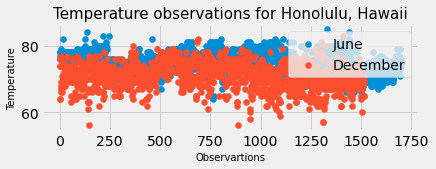

In [236]:
# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(range(len(junetemps)), np.array(junetemps), label="June")
plt.scatter(range(len(dectemps)), np.array(dectemps), label="December")
plt.title("Temperature observations for Honolulu, Hawaii", fontsize=15)
plt.xlabel('Observartions', fontsize=10)
plt.ylabel('Temperature', fontsize=10)
plt.legend(loc=1)

plt.show()

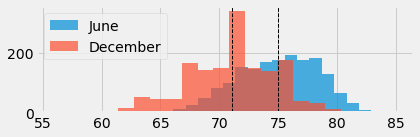

In [246]:
# Histogram Plot of Data
plt.subplot(2, 1, 1)
plt.hist(np.array(junetemps), 20, alpha=0.7, label="June")
plt.hist(np.array(dectemps), 20, alpha=0.7, label="December")
plt.axvline(juneavg, color='k', linestyle='dashed', linewidth=1)
plt.axvline(decavg, color='k', linestyle='dashed', linewidth=1)
plt.legend()  

In [262]:
# Two-sample t-test in Python using SciPy:
# Note: The histogram indicates that the data sets fo not have equal variance.
# Therefor, setting equal_var=False performs Welch's t-test which does not assume equal population variance

ttest = stats.ttest_ind(junetemps, dectemps, equal_var=False)

ttest


Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))

In [ ]:
less than the significance level alpha (e.g., 0.05)
that we can conclude that the men’s average height is statistically different from the female’s average height. 

### Temperature Analysis II
Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
#    """TMIN, TAVG, and TMAX for a list of dates.
#    
#    Args:
#        start_date (string): A date string in the format %Y-%m-%d
#        end_date (string): A date string in the format %Y-%m-%d
#        
#    Returns:
#        TMIN, TAVE, and TMAX
#    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
    #Define trip dates - accept date input in australian date format
    #https://www.tutorialspoint.com/How-to-convert-Python-date-string-mm-dd-yyyy-to-datetime
    #https://thispointer.com/python-how-to-convert-datetime-object-to-string-using-datetime-strftime/

vacationstart = '25/05/2017'
vacationend = '3/06/2017'

#convert to datetime string
#startdt = (dt.datetime.strptime(holidaystart, '%d/%m/%Y')).strftime("%Y-%m-%d")
#enddt = (dt.datetime.strptime(vacationend, '%d/%m/%Y')).strftime("%Y-%m-%d")




In [ ]:
#convert to datetime
startdt = dt.datetime.strptime(vacationstart, '%d/%m/%Y')
enddt = dt.datetime.strptime(vacationend, '%d/%m/%Y')


print(f"The vacation dates are from {startdt.date()} to {enddt.date()}.")

In [ ]:
    #Calculate start and end dates for the previous year
start_date = startdt - dt.timedelta(days=365)
end_date = enddt - dt.timedelta(days=365)
#year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

print(f"The query dates are from {start_date.date()} to {end_date.date()}.")


In [ ]:
# for your trip using the previous year's data for those same dates.
    #test data

#print(calc_temps('2016-05-25', '2016-06-03'))

In [ ]:
# for your trip using the previous year's data for those same dates.
        #test data
print(calc_temps(start_date.date(), end_date.date()))

In [ ]:
tempsummary = (calc_temps(start_date.date(), end_date.date()))
print(f"For the dates {start_date.date()} to {end_date.date()}, the minimum temperature is {tempsummary[0][0]}, the average is {tempsummary[0][1]} and the maximum is {tempsummary[0][2]}.")

In [ ]:
    #Query prevous year
#start_date = dt.datetime(holidaystart) - dt.timedelta(days=365)
#end_date = dt.date(vacationend) - dt.timedelta(days=365)


#start_date






#start_date= dt.datetime.strptime(start, '%Y-%m-%d')
#    last_year = dt.timedelta(days=365)
#   start = start_date-last_year
#    end =  dt.date(2017, 8, 23

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
#Do something to close session
session.close()